# ATP Tennis Data - 1985 to 2018 with matchup


In this dataset, we are going to run our models with data dating back to 1985 to see if more data actually helps with our predictions.

### Results that did the best model (history diff)

```
Model Score: 0.6906819716407833

ROC/AUC Score: 0.6906426130517523
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.70      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```

# Summary of Results

This actually brought down our accuracy quite a bit suggesting that match behavior is changing over time as later matches may be better predictors of our outcome

```
Model Score: 0.6690823190262652

ROC/AUC Score: 0.669077794849172
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976
```



# Already ran this notebook

Found that adding more history data doesn't help our models. Going to throw an exception here so when I re-run all notebooks from command line it will skip this one and not overwrite the cell values

In [1]:
raise Exception("Don't run this!")

Exception: Don't run this!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-matchup_diff-1985"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe-history5-matchup5-stats5.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"

else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5-stats5.csv'

START_YEAR = 1985
END_YEAR = 2018




In [3]:
import re

def filter_features(data: pd.DataFrame):
    history_columns = [col for col in data.columns if re.search('history', col)]
    print(f'Before: data.shape {data.shape}')
    data = data.drop(history_columns, axis=1)

    # drop all columns that doesn't have diff
    matchup_columns = [col for col in data.columns if re.search('matchup', col) and not re.search('diff', col)]
    data = data.drop(matchup_columns, axis=1)
    

    stats_columns = [col for col in data.columns if re.search("stats", col)]
    data = data.drop(stats_columns, axis=1)



    print(f'After: data.shape {data.shape}')
    
    return data


In [4]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, data_filter = feature_filter)

NameError: name 'feature_filter' is not defined

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [5]:
[col for col in X_train.columns if re.search('matchup', col)]

NameError: name 'X_train' is not defined

# Logistic Regression

In [6]:

# train our model

lr = mu.ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_lr = lr.predict()

NameError: name 'X_train' is not defined

In [7]:
lr.analyze()

NameError: name 'lr' is not defined

In [8]:
# ju.plot_2d(X_test, y_predict_lr)

In [9]:
lr.save()

NameError: name 'lr' is not defined

# KNN

In [10]:

# train our model

knn = mu.ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_knn = knn.predict()

NameError: name 'X_train' is not defined

In [11]:
knn.analyze()

NameError: name 'knn' is not defined

In [12]:
# ju.plot_2d(X_test, y_predict_knn)

In [13]:
knn.save()

NameError: name 'knn' is not defined

# Decision Tree

In [14]:

# train our model

dt = mu.ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_dt = dt.predict()

NameError: name 'X_train' is not defined

In [15]:
dt.analyze()

NameError: name 'dt' is not defined

In [16]:
# ju.plot_2d(X_test, y_predict_dt)

In [17]:
dt.save()

NameError: name 'dt' is not defined

# Random Forest Classifier

In [18]:

# train our model

rf = mu.ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_rf = rf.predict()

NameError: name 'X_train' is not defined

In [19]:
rf.analyze()

NameError: name 'rf' is not defined

In [20]:
# ju.plot_2d(X_test, y_predict_rf)

In [21]:
rf.save()

NameError: name 'rf' is not defined

# Gradient Boosting

In [22]:

# train our model

gb = mu.ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_gb = gb.predict()

NameError: name 'X_train' is not defined

In [23]:
gb.analyze()

NameError: name 'gb' is not defined

In [24]:
# ju.plot_2d(X_test, y_predict_gb)

In [25]:
gb.save()

NameError: name 'gb' is not defined

# AdaBoost

In [26]:
ab = mu.ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_ab = ab.predict()

NameError: name 'X_train' is not defined

In [27]:
ab.analyze()

NameError: name 'ab' is not defined

In [28]:
# ju.plot_2d(X_test, y_predict_ab)

In [29]:
ab.save()

NameError: name 'ab' is not defined

# Results

In [30]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(6)

,accuracy,classification_report,confusion_matrix,data_file,data_filter_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,roc_auc_score,start_year,total_time_min
217,0.665564,"{""Loss"": {""precision"": 0.6680974799224592, ""re...","{""0"": {""0"": 4825, ""1"": 2397}, ""1"": {""0"": 2556,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/adaboostclassifier-1998-2018-ohe-mat...,ohe-matchup_percentage,2018,1.0,../models/adaboostclassifier-1998-2018-ohe-mat...,AdaBoostClassifier,0.0,0.665525,1998,1.0
218,0.662525,"{""Loss"": {""precision"": 0.6608179241463086, ""re...","{""0"": {""0"": 4896, ""1"": 2513}, ""1"": {""0"": 2485,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/logisticregression-1998-2018-ohe-mat...,ohe-matchup_diff,2018,0.0,../models/logisticregression-1998-2018-ohe-mat...,LogisticRegression,0.0,0.662528,1998,0.0
219,0.602836,"{""Loss"": {""precision"": 0.602544807771241, ""rec...","{""0"": {""0"": 4404, ""1"": 2905}, ""1"": {""0"": 2977,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/decisiontreeclassifier-1998-2018-ohe...,ohe-matchup_diff,2018,0.0,../models/decisiontreeclassifier-1998-2018-ohe...,DecisionTreeClassifier,0.0,0.602816,1998,0.0
220,0.640581,"{""Loss"": {""precision"": 0.6200980392156863, ""re...","{""0"": {""0"": 5313, ""1"": 3255}, ""1"": {""0"": 2068,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/randomforestclassifier-1998-2018-ohe...,ohe-matchup_diff,2018,0.0,../models/randomforestclassifier-1998-2018-ohe...,RandomForestClassifier,0.0,0.640837,1998,0.0
221,0.683862,"{""Loss"": {""precision"": 0.6846353810370776, ""re...","{""0"": {""0"": 5004, ""1"": 2305}, ""1"": {""0"": 2377,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/gradientboostingclassifier-1998-2018...,ohe-matchup_diff,2018,13.0,../models/gradientboostingclassifier-1998-2018...,GradientBoostingClassifier,0.0,0.683843,1998,13.0
222,0.666442,"{""Loss"": {""precision"": 0.6703895016054726, ""re...","{""0"": {""0"": 4802, ""1"": 2361}, ""1"": {""0"": 2579,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/adaboostclassifier-1998-2018-ohe-mat...,ohe-matchup_diff,2018,1.0,../models/adaboostclassifier-1998-2018-ohe-mat...,AdaBoostClassifier,0.0,0.666390,1998,1.0


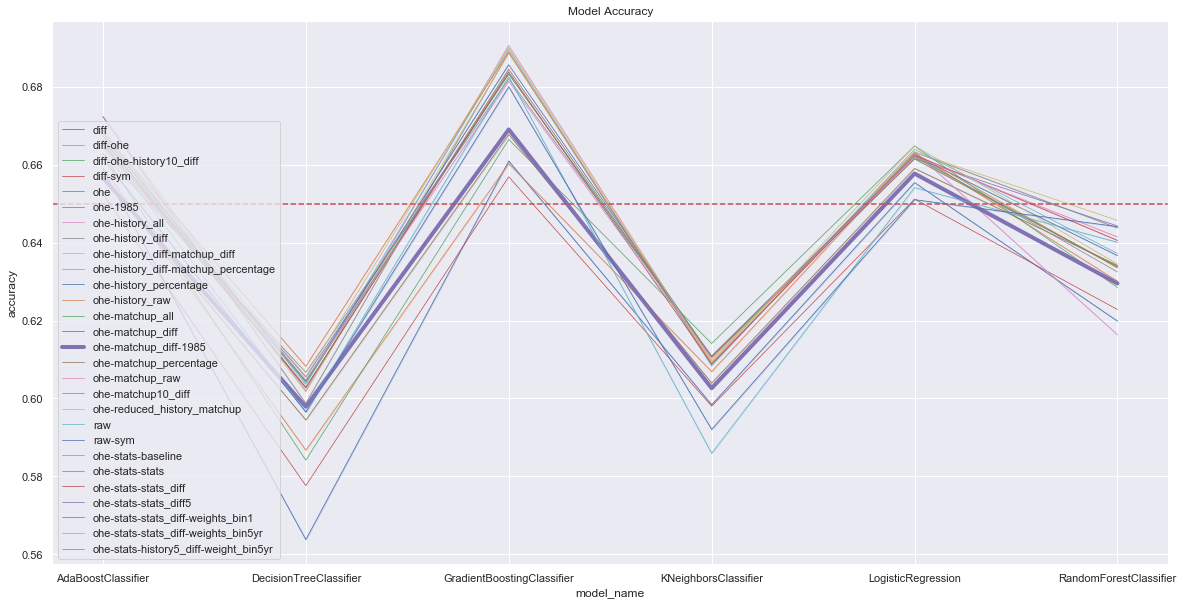

In [31]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


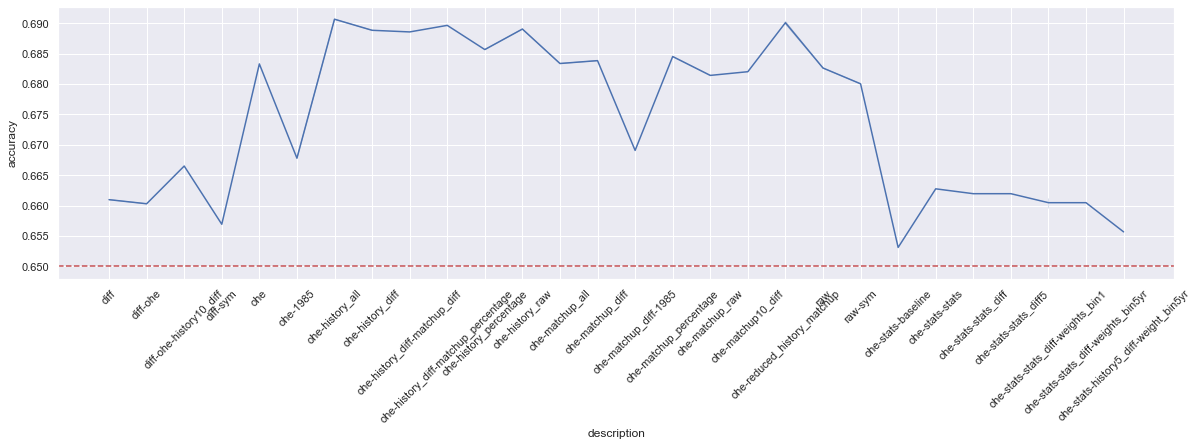

In [32]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [33]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [34]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

NameError: name 'X_train' is not defined

In [35]:
shap.summary_plot(shap_values, X_test, max_display=30)

NameError: name 'shap_values' is not defined

In [36]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

NameError: name 'shap_values' is not defined

In [37]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-26 13:41
